<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/%EC%98%88%EC%A0%9C1_%EC%9C%A0%EB%B0%A9%EC%95%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 43.6MB/s 
     |████████████████████████████████| 512kB 25.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=e353eb83be31fde5f59d4def056b77c0cee7b307b8344e111014574c6ab39080
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
tf.set_random_seed(777)

In [0]:
# 데이터 확인, 분석을 위해 pandas 를 사용
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/logistic/kaggle/예제1_유방암.csv', dtype=np.float32) # 칼럼명까지 같이 읽어들임
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

In [0]:
xy_df.columns = ['평균 반지름', '평균 질감', '평균 둘레', '평균 면적', '평균 평활도', '예측결과']  # 칼럼명 한글로 변경
xy_df # 데이터프레임 확인

,평균 반지름,평균 질감,평균 둘레,평균 면적,평균 평활도,예측결과
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.0
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.0
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.0
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.0
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.0
...,...,...,...,...,...,...
564,21.559999,22.389999,142.000000,1479.000000,0.11100,0.0
565,20.129999,28.250000,131.199997,1261.000000,0.09780,0.0
566,16.600000,28.080000,108.300003,858.099976,0.08455,0.0
567,20.600000,29.330000,140.100006,1265.000000,0.11780,0.0


In [0]:
pd.DataFrame(xy_df.mean(), columns=["평균 값"])

,평균 값
평균 반지름,14.127290
평균 질감,19.289654
평균 둘레,91.969032
평균 면적,654.889038
평균 평활도,0.096360
예측결과,0.627416


In [0]:
y_data = xy_df.iloc[:,-1].values.reshape(-1,1)  # 레이블 데이터(예측결과)를 numpy로 추출

In [0]:
x_data = xy_df.iloc[:,:-1].values  # 피쳐데이터를 numpy로 추출

In [0]:
# 넘파이 배열 내 데이터타입 변경
x_data = x_data.astype('float32')
y_data = y_data.astype('float32')

In [0]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(569, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [0]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(569, 5)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01]
 [1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01]
 [1.825e+01 1.998e+01 1.196e+02 1.040e+03 9.463e-02]]


In [0]:
np.unique(y_data, return_counts=True)

(array([0., 1.], dtype=float32), array([212, 357]))

In [0]:
# 테스트세트를 분리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, stratify=y_data, random_state=777) # 전체 데이터중 20%

In [0]:
np.unique(y_train, return_counts=True)

(array([0., 1.], dtype=float32), array([148, 250]))

In [0]:
print("학습용 ",x_train.shape, "\t", y_train.shape) # 학습용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (398, 5) 	 (398, 1)
테스트용  (171, 5) 	 (171, 1)


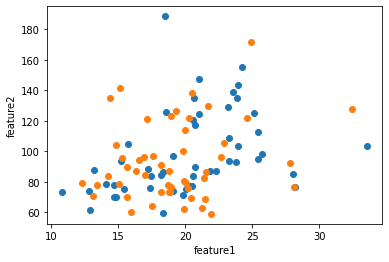

In [0]:
# 우선 전처리(표준화) 전의 데이터 분포 확인
plt.scatter(x_train[:50,1], x_train[:50,2])
plt.scatter(x_test[:50,1], x_test[:50,2])
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()  # 두번째 피쳐(평균 질감), 세번째피쳐(평균 둘레)의 데이터 분포

In [0]:
# 데이터 전처리(표준화)과정
scaler = StandardScaler()

In [0]:
# 학습, 테스트 세트의 표준화를 위해 먼저 학습세트의 평균, 표준편차를 구함
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 학습세트 표준화
x_train_scaled = scaler.transform(x_train) 

In [0]:
# 검증세트 표준화
x_test_scaled = scaler.transform(x_test)  # 학습세트와 같은 비율로 전처리하기 위해 학습세트의 평균, 표준편차를 그대로 사용

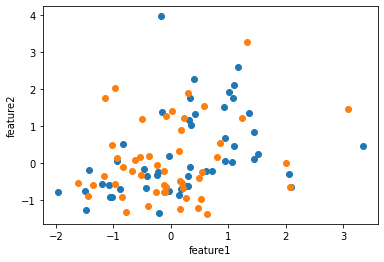

In [0]:
# 표준화된 데이터로 그래프 작성 -> 제대로 표준화 되었는지 확인
plt.scatter(x_train_scaled[:50,1], x_train_scaled[:50,2])
plt.scatter(x_test_scaled[:50,1], x_test_scaled[:50,2])
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()  # 값의 범위가 줄어든 그래프 

In [0]:
# 텐서플로우 그래프 그리기
num_x = x_data.shape[1]
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , 1]), name='weight') 
b = tf.Variable(tf.random.normal([1]), name='bias')

In [0]:
hypothesis = tf.sigmoid(tf.matmul(X,W) + b)

In [0]:
cost = -tf.reduce_mean(Y*tf.log(hypothesis) +  (1-Y)*tf.log(1-hypothesis))

In [0]:
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)

In [0]:
predicted = tf.cast(hypothesis > 0.5 , dtype=tf.float32)

In [0]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [0]:
epochs = 20001
  
for step in range(epochs):
  cost_val, W_all, _ = sess.run([cost, W, train], feed_dict={X:x_train_scaled, Y:y_train})
  cost_list.append(cost_val)
  w_history.append(W_all.copy())  

  if step % 2000 == 0:
    print("step : ",step,", cost : ", cost_val)

step :  0 , cost :  0.58410066
step :  2000 , cost :  0.34232667
step :  4000 , cost :  0.2737128
step :  6000 , cost :  0.24084982
step :  8000 , cost :  0.2213868
step :  10000 , cost :  0.2084639
step :  12000 , cost :  0.199244
step :  14000 , cost :  0.19233121
step :  16000 , cost :  0.18695565
step :  18000 , cost :  0.18265702
step :  20000 , cost :  0.17914268


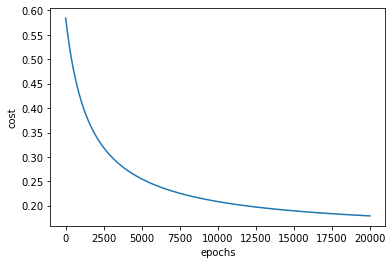

In [0]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

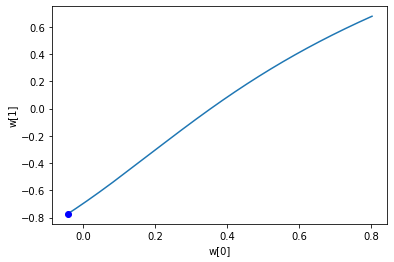

In [0]:
# 가중치 업데이트 과정 그래프 (평균반지름, 평균질감)
w0 = []
w1 = []
for w in  w_history:
  w0.append(w[0])
  w1.append(w[1])
plt.plot(w0, w1)
plt.plot(w0[-1], w1[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[1]')
plt.show()

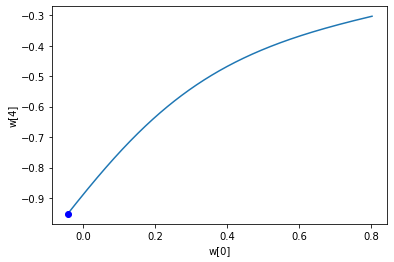

In [0]:
# 가중치 업데이트 과정 그래프 (평균반지름, 평균평활도)
w0 = []
w4 = []
for w in  w_history:
  w0.append(w[0])
  w4.append(w[4])
plt.plot(w0, w4)
plt.plot(w0[-1], w4[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[4]')
plt.show()

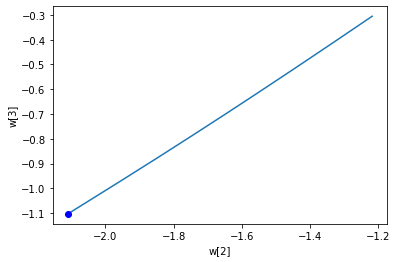

In [0]:
# 가중치 업데이트 과정 그래프 (평균둘레, 평균면적)
w2 = []
w3 = []
for w in  w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1],'bo')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [0]:
# 테스트 세트에 대한 정확도 구하기
a = sess.run(accuracy, feed_dict={X:x_test_scaled, Y:y_test})
print("정확도 : ", str(a*100)[:5], "%", sep="")

정확도 : 91.22%


In [0]:
# 임의의 값으로 예측하기 -> 표준화한 데이터로 모델을 만들었기 때문에 임의의 값을 넣어줄때도 임의의 값을 표준화함
test_data = np.array([[15,12,90,650,0.09]])
test_data_scaled = scaler.transform(test_data) 
print(test_data_scaled)

[[ 0.23482493 -1.68700826 -0.09808437 -0.02711758 -0.47783578]]


In [0]:
print(sess.run(predicted, feed_dict={X:test_data_scaled})) 

[[1.]]


In [0]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[15,12,120,650,0.09],
                     [5,12,120,650,0.09],
                     [15,2,120,650,0.09],
                     [15,12,50,650,0.09],
                     [15,12,120,300,0.09],
                     [15,12,120,650,0.01]])
X_test_5_scaled = scaler.transform(X_test_5) # 반지름 감소시 암발생률 증가,  질감 증가시 암발생률 감소,  둘레 증가시 암발생률 감소 , 면적 감소시 암발생률 증가, 평활도 증가시 암발생률 감소

In [0]:
print(sess.run(predicted, feed_dict={X:X_test_5_scaled}))

[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [0]:
try:
  x_input = input("입력(평균 반지름, 평균 질감, 평균 둘레, 평균 면적, 평균 평활도): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
  print("평균 반지름\t평균 질감\t평균 둘레\t평균 면적\t평균 평활도")
  for i in x_input_strip:
    print(i,end="\t\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = scaler.transform(x_input_test)

  print("예상 결과 : ", (sess.run(predicted, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")

입력(평균 반지름, 평균 질감, 평균 둘레, 평균 면적, 평균 평활도): 15,12,120,650,0.01
평균 반지름	평균 질감	평균 둘레	평균 면적	평균 평활도
15.0		12.0		120.0		650.0		0.01		
예상 결과 :  [[1.]]


In [0]:
result_df = pd.DataFrame(X_test_5, columns=['평균 반지름', '평균 질감', '평균 둘레', '평균 면적', '평균 평활도'])

In [0]:
result_df

,평균 반지름,평균 질감,평균 둘레,평균 면적,평균 평활도
0,15.0,12.0,120.0,650.0,0.09
1,5.0,12.0,120.0,650.0,0.09
2,15.0,2.0,120.0,650.0,0.09
3,15.0,12.0,50.0,650.0,0.09
4,15.0,12.0,120.0,300.0,0.09
5,15.0,12.0,120.0,650.0,0.01


In [0]:
result_df['예측 결과'] = sess.run(predicted, feed_dict={X:X_test_5_scaled})

In [0]:
result_df.loc[result_df["예측 결과"]==1,"예측 결과"] = "양성"
result_df.loc[result_df["예측 결과"]==0,"예측 결과"] = "음성"

In [0]:
result_df

,평균 반지름,평균 질감,평균 둘레,평균 면적,평균 평활도,예측 결과
0,15.0,12.0,120.0,650.0,0.09,음성
1,5.0,12.0,120.0,650.0,0.09,양성
2,15.0,2.0,120.0,650.0,0.09,양성
3,15.0,12.0,50.0,650.0,0.09,양성
4,15.0,12.0,120.0,300.0,0.09,양성
5,15.0,12.0,120.0,650.0,0.01,양성


In [0]:
sess.close()